<a href="https://colab.research.google.com/github/AhmadTawil1/basic_cnn/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %%
# 0) SETUP: imports, versions, and reproducibility
import os, random, numpy as np, tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


In [ ]:
# Reproducibility (not perfectly deterministic on GPU, but helps)
SEED = 42
random.seed(SEED); np.random.seed(SEED); tf.random.set_seed(SEED)

# %%
# 1) LOAD DATA: CIFAR-10 (60k color images, 32x32x3, 10 classes)
# Splits: 50,000 train, 10,000 test
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# CIFAR-10 labels:
class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

print("Train:", x_train.shape, y_train.shape)
print("Test: ", x_test.shape, y_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train: (50000, 32, 32, 3) (50000, 1)
Test:  (10000, 32, 32, 3) (10000, 1)


In [ ]:
# %%
# 2) PREPROCESS: scale pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Labels come as shape (N,1); squeeze to (N,) for convenience
y_train = y_train.squeeze()
y_test  = y_test.squeeze()

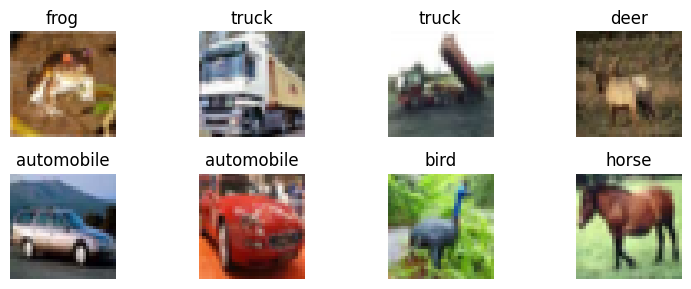

In [ ]:
# %%
# 3) (OPTIONAL) QUICK VISUAL CHECK OF A FEW SAMPLES
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 3))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout(); plt.show()

In [ ]:
# %%
# 4) BUILD THE MODEL: a basic CNN
#    Block structure:
#    [Conv -> ReLU -> MaxPool] x 2  -> Flatten -> Dense(100) -> Dense(10, softmax)
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),

    layers.Conv2D(16, kernel_size=3, strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2),                      # 32x32 -> 16x16

    layers.Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D(pool_size=2),                      # 16x16 -> 8x8

    layers.Flatten(),
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")                 # 10 classes
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       204,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 210,998 (824.21 KB)

 Trainable params: 210,998 (824.21 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# %%
# 5) COMPILE: choose optimizer, loss, metrics
#    - Sparse categorical crossentropy: use when labels are integers (not one-hot)
#    - Adam: good default optimizer
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [ ]:
# %%
# 6) TRAIN: fit on training data, validate on a hold-out split
#    - epochs: how many passes over the data (start small)
#    - batch_size: how many images per gradient update
#    - validation_split: hold out 10% of training for validation automatically
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.3814 - loss: 1.7139 - val_accuracy: 0.5506 - val_loss: 1.2630
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5673 - loss: 1.2222 - val_accuracy: 0.6058 - val_loss: 1.1155
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6252 - loss: 1.0657 - val_accuracy: 0.6362 - val_loss: 1.0436
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6611 - loss: 0.9664 - val_accuracy: 0.6550 - val_loss: 0.9893
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6837 - loss: 0.8966 - val_accuracy: 0.6692 - val_loss: 0.9589
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7049 - loss: 0.8372 - val_accuracy: 0.6764 - val_loss: 0.9481
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7256 - loss: 0.7831 - val_accuracy: 0.6804 - val_loss: 0.9475
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7419 - loss: 0.7343 - val_accuracy: 0.

In [ ]:
# %%
# 7) EVALUATE: measure test performance (never seen during training/validation)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test accuracy: {test_acc:.3f}  |  Test loss: {test_loss:.3f}")

Test accuracy: 0.672  |  Test loss: 1.011


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step


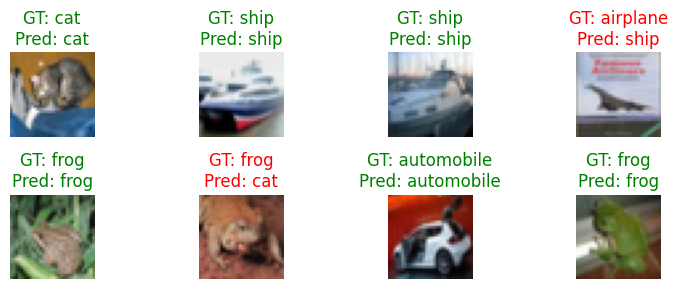

In [ ]:
# %%
# 8) PREDICT: run the trained model on a few test images
probs = model.predict(x_test[:8])              # probabilities for 10 classes
preds = probs.argmax(axis=1)

# Show predictions vs. ground-truth
plt.figure(figsize=(8,3))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i])
    t = class_names[y_test[i]]
    p = class_names[preds[i]]
    title = f"GT: {t}\nPred: {p}"
    color = "green" if t == p else "red"
    plt.title(title, color=color)
    plt.axis("off")
plt.tight_layout(); plt.show()

In [ ]:
# %%
# 9) (OPTIONAL) SMALL IMPROVEMENTS:
#    - Add Dropout for regularization
#    - Add Data Augmentation to improve generalization
#    You can re-run the cell below to create a slightly stronger baseline.

def build_improved_model():
    data_augmentation = keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
    ])

    model = keras.Sequential([
        layers.Input(shape=(32, 32, 3)),
        data_augmentation,

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.1),

        layers.Conv2D(64, 3, padding="same", activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.1),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(10, activation="softmax"),
    ])

    model.compile(
        optimizer=keras.optimizers.Adam(1e-3),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Uncomment to try:
improved_model = build_improved_model()
improved_model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.1)
print("Improved test acc:", improved_model.evaluate(x_test, y_test, verbose=0)[1])


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.2809 - loss: 1.9629 - val_accuracy: 0.4860 - val_loss: 1.4381
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4682 - loss: 1.4700 - val_accuracy: 0.5314 - val_loss: 1.3033
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5166 - loss: 1.3444 - val_accuracy: 0.5796 - val_loss: 1.1762
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5440 - loss: 1.2647 - val_accuracy: 0.5898 - val_loss: 1.1637
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5688 - loss: 1.1990 - val_accuracy: 0.6198 - val_loss: 1.0602
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5936 - loss: 1.1461 - val_accuracy: 0.6390 - val_loss: 1.0222
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6049 - loss: 1.1154 - val_accuracy: 0.6494 - val_loss: 1.0045
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6179 - loss: 1.0782 - 